In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
time = np.linspace(0, 100, 1000)
data1 = np.sin(time) + 0.1 * np.random.randn(len(time))  # Feature 1
data2 = np.cos(time) + 0.1 * np.random.randn(len(time))  # Feature 2

data = np.stack((data1, data2), axis=1)  # shape: [1000, 2]
data = torch.FloatTensor(data)

In [3]:
# 2. Hyperparameters
input_size = 2      # number of features
hidden_size = 64
num_layers = 2
seq_length = 20
lr = 0.001
epochs = 100

In [ ]:
# 3. Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]  # Predict next value of feature 0
        xs.append(x)
        ys.append(y)
    return torch.stack(xs), torch.stack(ys)

X, y = create_sequences(data, seq_length)
# X shape: [batch, seq_len, input_size]
# y shape: [batch]

In [10]:
X.shape, y.shape

(torch.Size([980, 20, 2]), torch.Size([980]))

In [11]:
data.shape

torch.Size([1000, 2])

In [8]:
# 4. Train/test split
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([784, 20, 2]),
 torch.Size([784]),
 torch.Size([196, 20, 2]),
 torch.Size([196]))

In [ ]:
# 5. Define model
class MultiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        last_hidden = out[:, -1, :]
        return self.linear(last_hidden)

model = MultiLSTM(input_size, hidden_size, num_layers)

# 6. Train model
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for epoch in range(epochs):
    model.train()
    output = model(X_train).squeeze()
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 0.4014
Epoch 20/100, Loss: 0.0507
Epoch 30/100, Loss: 0.0178
Epoch 40/100, Loss: 0.0172
Epoch 50/100, Loss: 0.0124
Epoch 60/100, Loss: 0.0124
Epoch 70/100, Loss: 0.0117
Epoch 80/100, Loss: 0.0115
Epoch 90/100, Loss: 0.0114
Epoch 100/100, Loss: 0.0113


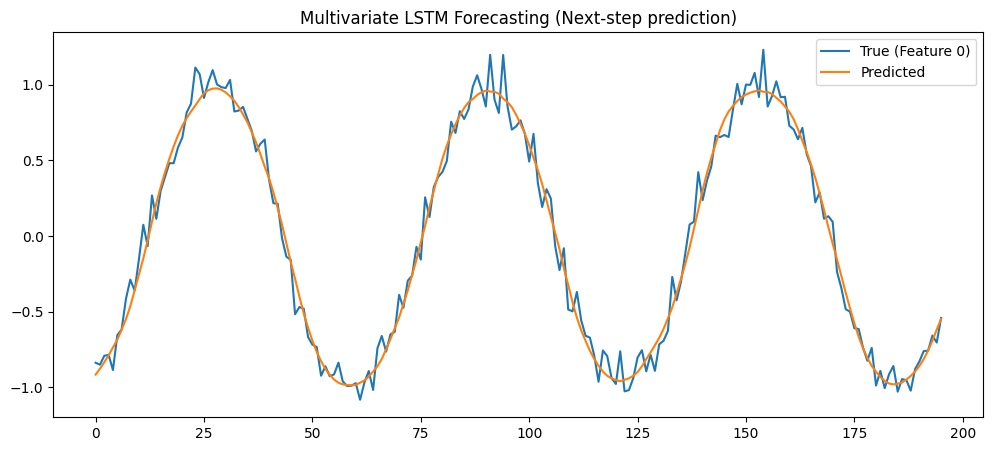

In [17]:
model.eval()
with torch.no_grad():
    preds = model(X_test).squeeze()

plt.figure(figsize=(12, 5))
plt.plot(y_test.numpy(), label="True (Feature 0)")
plt.plot(preds.numpy(), label="Predicted")
plt.title("Multivariate LSTM Forecasting (Next-step prediction)")
plt.legend()
plt.show()
